
# IDS for IoT Classification
In this notebook, we are going to classify benign data or not, using several machine learning algorithms. The steps we are going to follow are:

- Import the necessary libraries
- Load and explore the dataset
- Preprocess the data
- Visualize the data
- Split the dataset into training and testing sets
- Train several models and evaluate their performances





In [32]:
#Imports
#Below are all the imports used in the notebook.
# Common
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Data Processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


# Performace Measures
from sklearn.metrics import classification_report, confusion_matrix


# Data Loading
We start by loading the data from an excel file using pandas.
first we need to mount the drive

In [33]:
#Data
#To solve a problem we need to have a look at the problem first.
# File Path
file_path_train = 'multi class 34/train.csv'
file_path_test = 'multi class 34/train.csv'

# Load data
dfTrain = pd.read_csv(file_path_train)
dfTest=pd.read_csv(file_path_test)



# Information about the dataset

>




In [34]:
dfTrain.head()


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000838,54.62,6.05,64.00,11.961779,11.961779,0.0,0.0,0.0,0.0,...,0.111473,54.45,8.307598e+07,9.5,10.392912,0.037895,0.035900,0.02,141.55,DDoS-TCP_Flood
1,0.005486,75.88,6.00,64.00,29.502125,29.502125,0.0,0.0,1.0,0.0,...,0.100314,54.24,8.309325e+07,9.5,10.395361,0.143036,0.346802,0.03,141.55,DDoS-SYN_Flood
2,0.000000,0.00,45.61,65.81,151.517376,151.517376,0.0,0.0,0.0,0.0,...,57.165223,576.80,8.369379e+07,9.5,33.783684,80.958879,8638.780727,0.40,141.55,Mirai-greeth_flood
3,0.000000,54.00,6.00,64.00,1.500542,1.500542,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309408e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
4,0.004568,745.42,5.95,65.13,8.082100,8.082100,0.0,0.0,0.0,0.0,...,549.190629,927.04,8.333561e+07,9.5,41.550978,776.661367,318084.344439,0.95,141.55,DDoS-ACK_Fragmentation


In [35]:
dfTest.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000838,54.62,6.05,64.00,11.961779,11.961779,0.0,0.0,0.0,0.0,...,0.111473,54.45,8.307598e+07,9.5,10.392912,0.037895,0.035900,0.02,141.55,DDoS-TCP_Flood
1,0.005486,75.88,6.00,64.00,29.502125,29.502125,0.0,0.0,1.0,0.0,...,0.100314,54.24,8.309325e+07,9.5,10.395361,0.143036,0.346802,0.03,141.55,DDoS-SYN_Flood
2,0.000000,0.00,45.61,65.81,151.517376,151.517376,0.0,0.0,0.0,0.0,...,57.165223,576.80,8.369379e+07,9.5,33.783684,80.958879,8638.780727,0.40,141.55,Mirai-greeth_flood
3,0.000000,54.00,6.00,64.00,1.500542,1.500542,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309408e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
4,0.004568,745.42,5.95,65.13,8.082100,8.082100,0.0,0.0,0.0,0.0,...,549.190629,927.04,8.333561e+07,9.5,41.550978,776.661367,318084.344439,0.95,141.55,DDoS-ACK_Fragmentation


# Data Visualization
Before we proceed with any machine learning, let's visualize the data to get a sense of the classess.


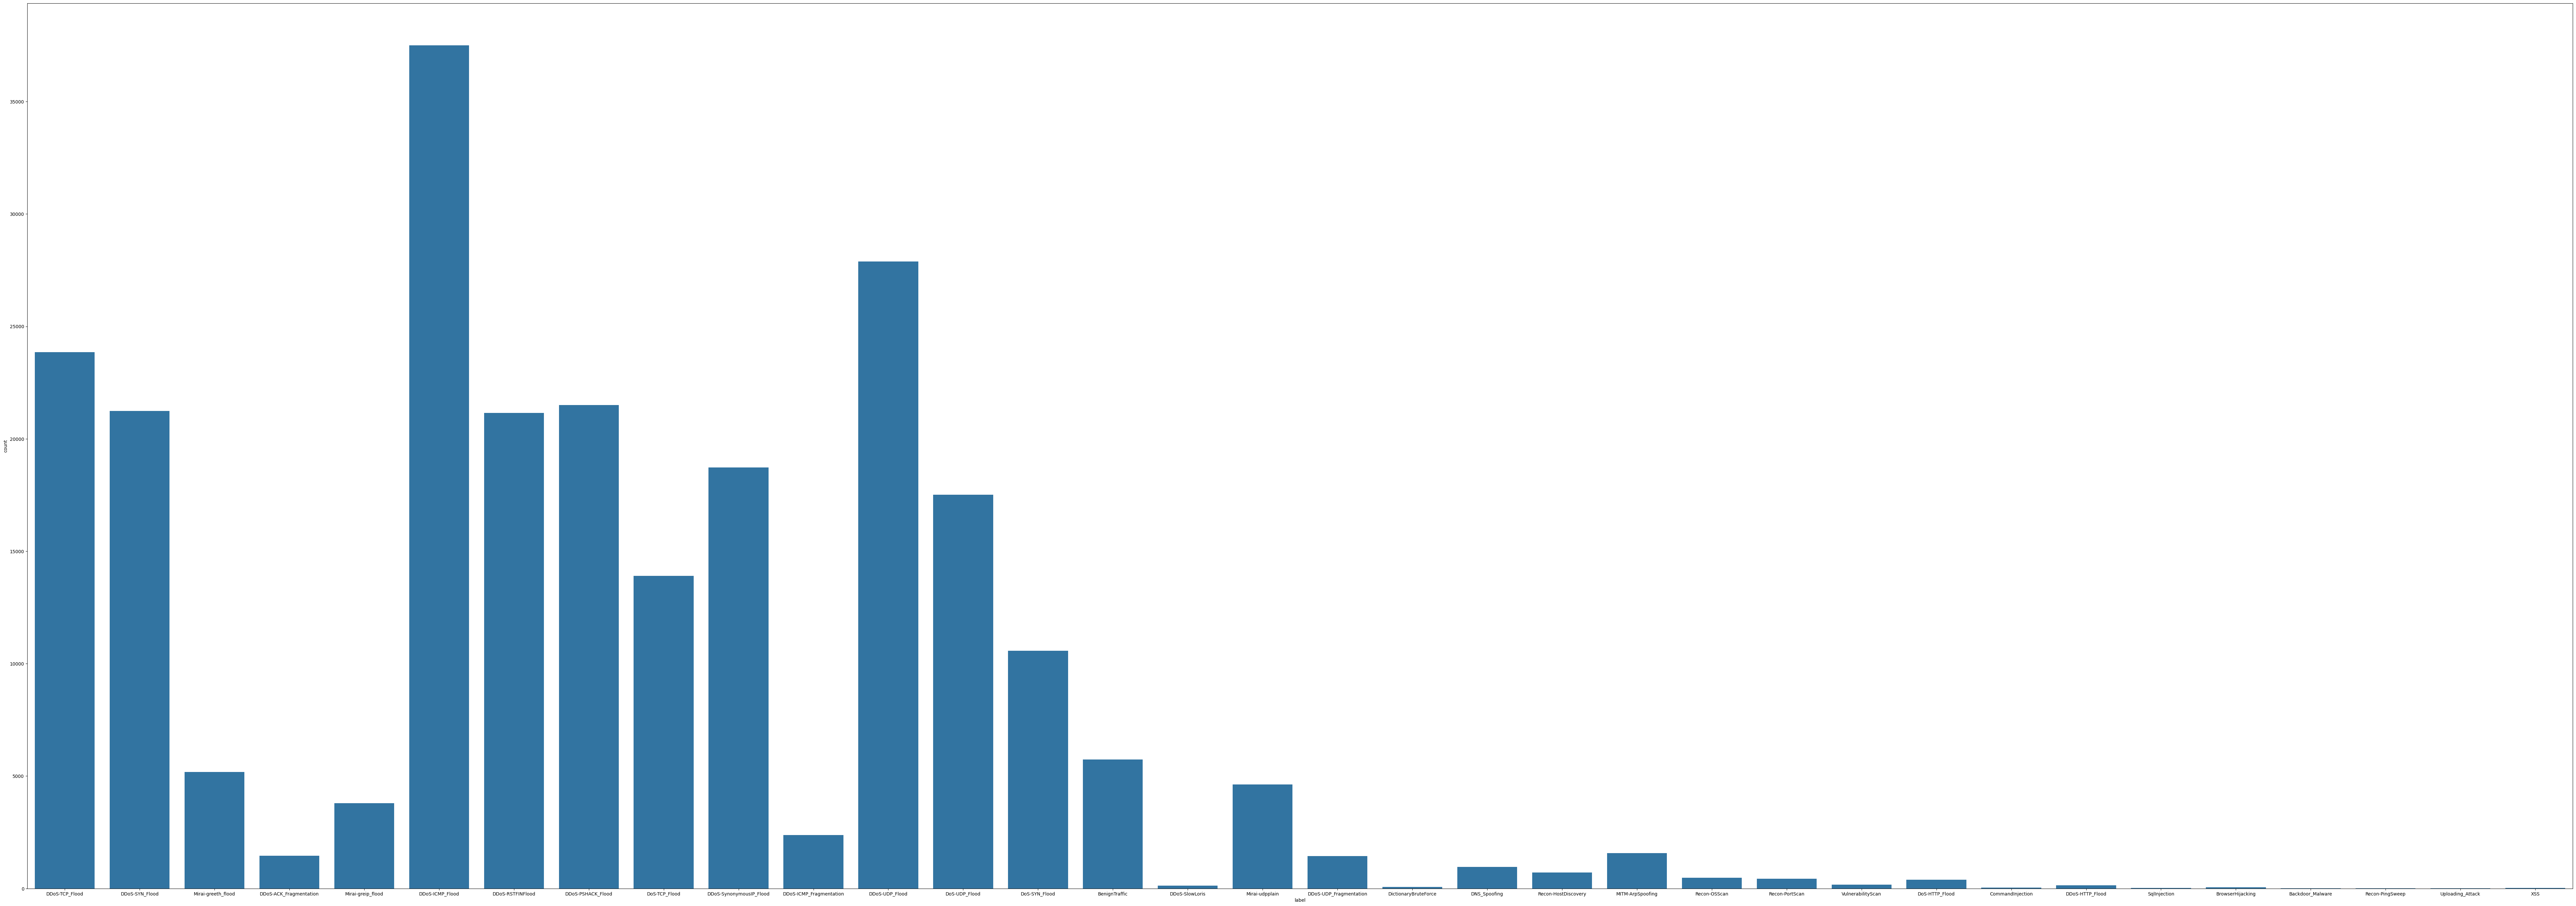

In [36]:
#Data Visualization
#Let's first have a look at the Class Distribution.
# Class Distribution
plt.figure(figsize=(100, 35))
sns.countplot(x='label', data=dfTrain)
plt.show()

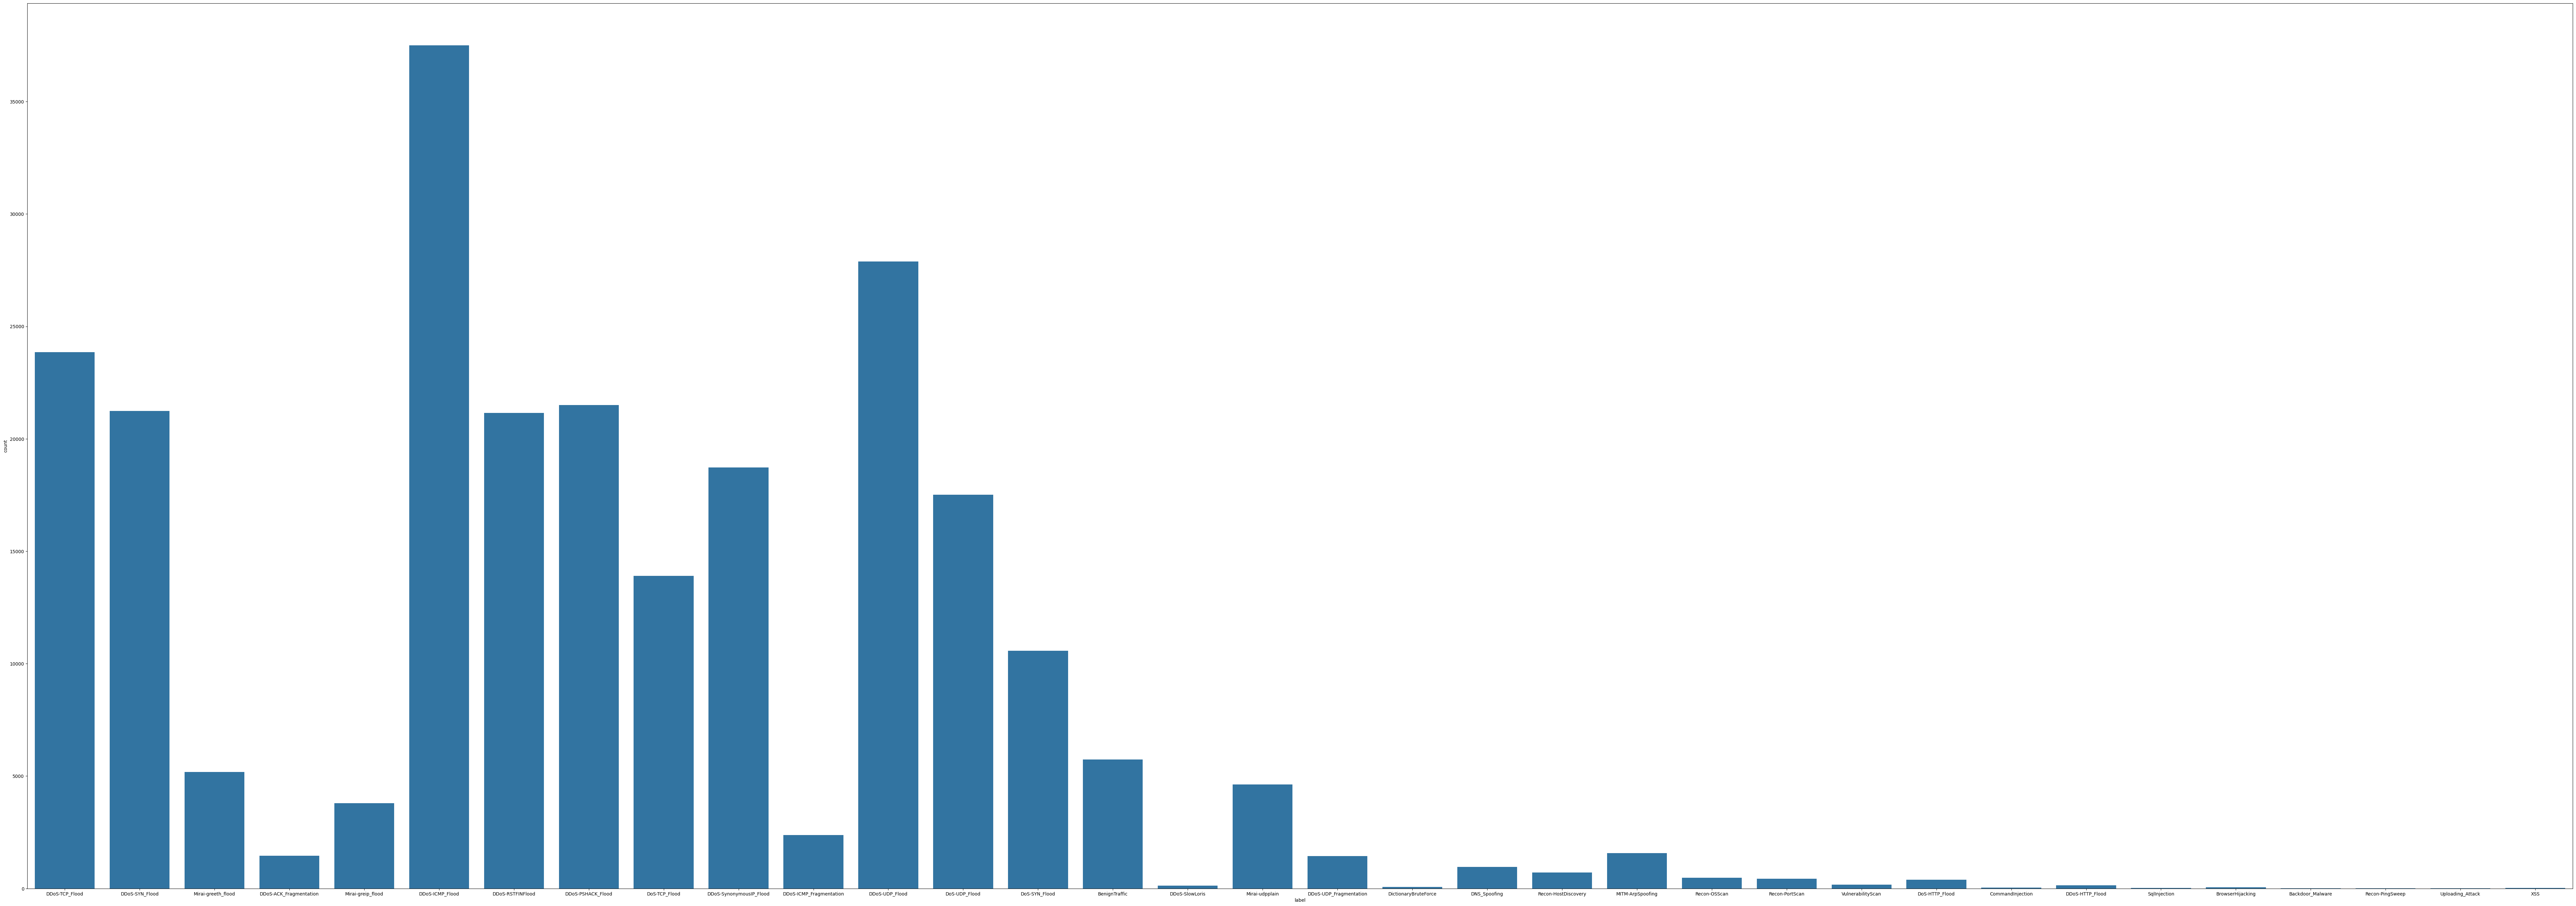

In [37]:
#Data Visualization
#Let's first have a look at the Class Distribution.
# Class Distribution
plt.figure(figsize=(100, 35))
sns.countplot(x='label', data=dfTest)
plt.show()

# Data Preprocessing
We will encode the categorical variables. Also, the features need to be scaled for some of the models to perform well.


In [38]:
dfTrain.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243649 entries, 0 to 243648
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    243649 non-null  float64
 1   Header_Length    243649 non-null  float64
 2   Protocol Type    243649 non-null  float64
 3   Duration         243649 non-null  float64
 4   Rate             243649 non-null  float64
 5   Srate            243649 non-null  float64
 6   Drate            243649 non-null  float64
 7   fin_flag_number  243649 non-null  float64
 8   syn_flag_number  243649 non-null  float64
 9   rst_flag_number  243649 non-null  float64
 10  psh_flag_number  243649 non-null  float64
 11  ack_flag_number  243649 non-null  float64
 12  ece_flag_number  243649 non-null  float64
 13  cwr_flag_number  243649 non-null  float64
 14  ack_count        243649 non-null  float64
 15  syn_count        243649 non-null  float64
 16  fin_count        243649 non-null  floa

In [39]:
le = LabelEncoder()
dfTrain.label =le.fit_transform(dfTrain.label)



dfTrain.label.value_counts()


label
6     37502
14    27891
13    23858
8     21507
10    21241
9     21149
12    18730
21    17507
20    13898
19    10574
1      5738
23     5180
25     4626
24     3789
7      2382
22     1578
4      1455
15     1442
16      954
26      711
27      469
29      432
18      384
32      165
5       138
11      131
17       69
2        49
3        33
30       21
33       18
28       13
0        10
31        5
Name: count, dtype: int64

In [40]:
dfTrain.label =le.fit_transform(dfTrain.label)

In [41]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243649 entries, 0 to 243648
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    243649 non-null  float64
 1   Header_Length    243649 non-null  float64
 2   Protocol Type    243649 non-null  float64
 3   Duration         243649 non-null  float64
 4   Rate             243649 non-null  float64
 5   Srate            243649 non-null  float64
 6   Drate            243649 non-null  float64
 7   fin_flag_number  243649 non-null  float64
 8   syn_flag_number  243649 non-null  float64
 9   rst_flag_number  243649 non-null  float64
 10  psh_flag_number  243649 non-null  float64
 11  ack_flag_number  243649 non-null  float64
 12  ece_flag_number  243649 non-null  float64
 13  cwr_flag_number  243649 non-null  float64
 14  ack_count        243649 non-null  float64
 15  syn_count        243649 non-null  float64
 16  fin_count        243649 non-null  floa

In [42]:
dfTest.label =le.fit_transform(dfTest.label)

In [43]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243649 entries, 0 to 243648
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    243649 non-null  float64
 1   Header_Length    243649 non-null  float64
 2   Protocol Type    243649 non-null  float64
 3   Duration         243649 non-null  float64
 4   Rate             243649 non-null  float64
 5   Srate            243649 non-null  float64
 6   Drate            243649 non-null  float64
 7   fin_flag_number  243649 non-null  float64
 8   syn_flag_number  243649 non-null  float64
 9   rst_flag_number  243649 non-null  float64
 10  psh_flag_number  243649 non-null  float64
 11  ack_flag_number  243649 non-null  float64
 12  ece_flag_number  243649 non-null  float64
 13  cwr_flag_number  243649 non-null  float64
 14  ack_count        243649 non-null  float64
 15  syn_count        243649 non-null  float64
 16  fin_count        243649 non-null  floa

# Splitting the Data and Scaling
The data is split into training and testing sets. This allows us to evaluate how our model performs on unseen data.


In [44]:
# Data Splitting for training
# Seperate Features and Columns
y = dfTrain.pop('label').to_numpy()
X = dfTrain.to_numpy()


In [45]:
# Data Splitting for Testing
# Seperate Features and Columns
z = dfTest.pop('label').to_numpy()
w = dfTest.to_numpy()

In [46]:
#Scaling training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Scaling testing
scaler = StandardScaler()
w_scaled = scaler.fit_transform(w)

# Training Models
We will train several models and evaluate their performance. We start with Logistic Regression, followed by , Decision Tree, and Random Forest and finnaly XGboost

In [48]:
X_train,w_test,y_train,z_test=train_test_split(X_scaled,y,random_state=42,shuffle=True)

In [49]:
# logistic regression WITH HEAT MAP

# number of iterations
max_iter = 300
log_reg = LogisticRegression(max_iter=max_iter)
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(w_test)



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.68      0.93      0.79      1435
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       0.97      0.98      0.98       342
           5       0.56      0.55      0.55        42
           6       1.00      1.00      1.00      9308
           7       0.99      0.97      0.98       594
           8       1.00      1.00      1.00      5396
           9       1.00      1.00      1.00      5327
          10       0.65      0.96      0.78      5212
          11       0.53      0.26      0.35        34
          12       0.78      0.71      0.74      4689
          13       0.66      0.96      0.79      6019
          14       0.70      0.97      0.81      6996
          15       0.98      0.97      0.97       334
          16       0.33      0.15      0.21       240
          17       0.00    

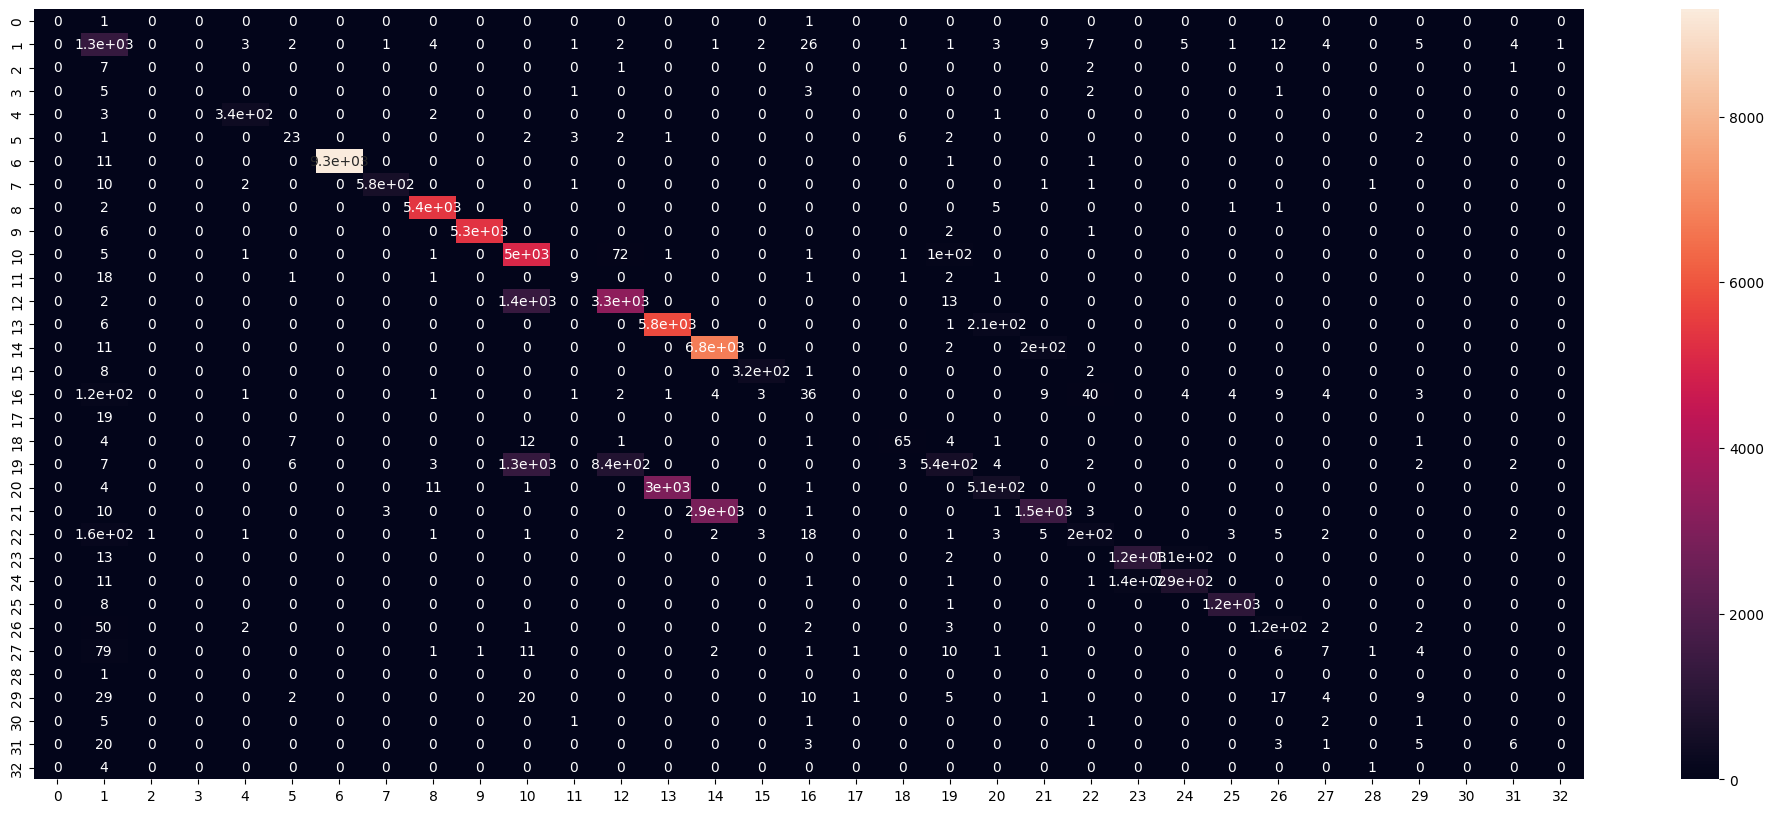

In [50]:
# measures
print(classification_report(z_test, y_pred))

# confusion matrix
cm = confusion_matrix(z_test, y_pred)
plt.figure(figsize=(25, 10))

sns.heatmap(cm, annot=True)
plt.show()

In [51]:
# ML Models

# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
pred = lr.predict(w_test)



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
# Calc  confusionmatrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("Logistic Regression : \n")
print(f"\nConfusion Matrix : \n")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=1000, height=1000)
fig.show()
print(classification_report(z_test, pred))

Logistic Regression : 


Confusion Matrix : 



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.69      0.93      0.79      1435
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       0.98      0.99      0.98       342
           5       0.44      0.55      0.49        42
           6       1.00      1.00      1.00      9308
           7       0.99      0.97      0.98       594
           8       1.00      1.00      1.00      5396
           9       1.00      1.00      1.00      5327
          10       0.65      0.96      0.77      5212
          11       0.50      0.18      0.26        34
          12       0.76      0.70      0.73      4689
          13       0.65      0.96      0.78      6019
          14       0.70      0.97      0.81      6996
          15       0.96      0.98      0.97       334
          16       0.36      0.16      0.22       240
          17       0.00    

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [53]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prediction
pred = dtc.predict(w_test)



In [54]:
# Calc  confusion matrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("Decision Tree Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=1000, height=1000)
fig.show()
print(classification_report(z_test, pred))

Decision Tree Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.91      0.91      0.91      1435
           2       0.50      0.45      0.48        11
           3       0.75      0.50      0.60        12
           4       0.99      0.99      0.99       342
           5       1.00      0.95      0.98        42
           6       1.00      1.00      1.00      9308
           7       0.99      0.99      0.99       594
           8       1.00      1.00      1.00      5396
           9       1.00      1.00      1.00      5327
          10       1.00      1.00      1.00      5212
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00      4689
          13       1.00      1.00      1.00      6019
          14       1.00      1.00      1.00      6996
          15       0.99      0.99      0.99       334
          16       0.72      0.70      0.71       240
          17       0.48    

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being 



```
# This is formatted as code
```

# Feature Importance
Let's look at the most important features according to the decision tree model.


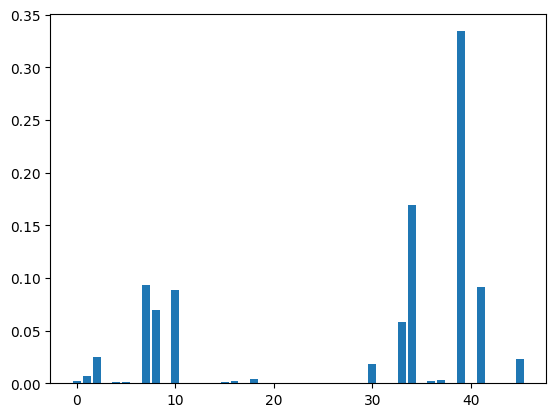

The 3 most important features are: 
IAT : 0.33420770483292167
Min : 0.16899915903141235
fin_flag_number : 0.093247085642957


In [55]:
# Feature Importance for Decision Tree
importance = dtc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# print the 3 most important features
print("The 3 most important features are: ")
for i in range(3):
    print(dfTrain.columns[np.argmax(importance)], ":", np.max(importance))
    importance = np.delete(importance, np.argmax(importance))




In [56]:
# Random Forest Classifier
RF = RandomForestClassifier(max_depth=4)
RF.fit(X_train, y_train)

predd = RF.predict(w_test)
# Calc  confusion matrix
cm = confusion_matrix(predd, z_test)



In [57]:
# Show CM and classification_repor
print("Random Forest Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=1000, height=1000)
fig.show()
print(classification_report(z_test, pred))

Random Forest Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.91      0.91      0.91      1435
           2       0.50      0.45      0.48        11
           3       0.75      0.50      0.60        12
           4       0.99      0.99      0.99       342
           5       1.00      0.95      0.98        42
           6       1.00      1.00      1.00      9308
           7       0.99      0.99      0.99       594
           8       1.00      1.00      1.00      5396
           9       1.00      1.00      1.00      5327
          10       1.00      1.00      1.00      5212
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00      4689
          13       1.00      1.00      1.00      6019
          14       1.00      1.00      1.00      6996
          15       0.99      0.99      0.99       334
          16       0.72      0.70      0.71       240
          17       0.48    

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being 

In [58]:
# XGB Classifier
XGB = XGBClassifier(max_depth=6)
XGB.fit(X_train, y_train)

# Prediction
pred = XGB.predict(w_test)



In [59]:
# Calc  confusion matrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("XGB Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=1000, height=1000)
fig.show()
print(classification_report(z_test, pred))

XGB Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.88      0.96      0.92      1435
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       1.00      1.00      1.00       342
           5       0.97      0.93      0.95        42
           6       1.00      1.00      1.00      9308
           7       1.00      0.98      0.99       594
           8       1.00      1.00      1.00      5396
           9       1.00      1.00      1.00      5327
          10       1.00      1.00      1.00      5212
          11       0.94      1.00      0.97        34
          12       1.00      1.00      1.00      4689
          13       1.00      1.00      1.00      6019
          14       1.00      1.00      1.00      6996
          15       1.00      0.99      0.99       334
          16       0.66      0.62      0.64       240
          17       0.00    

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Model Comparison
Now that we have trained multiple models, let's compare their performance side-by-side.


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.802475       0.801093
1        Decision Tree        1.000000       0.992711
2        Random Forest        0.824134       0.992711
3                  XGB        0.999858       0.991808


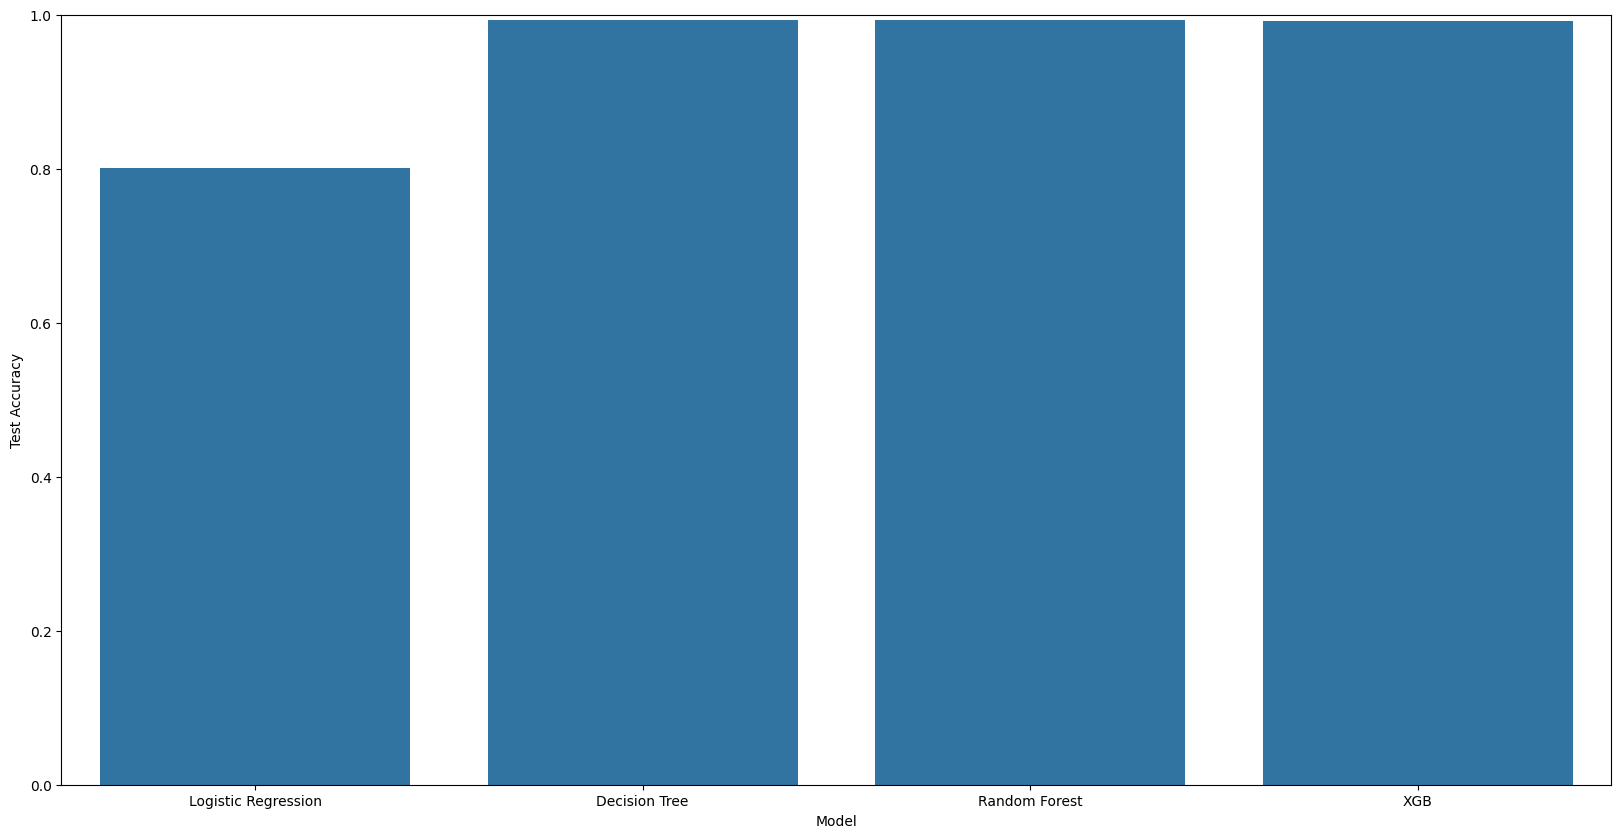

In [60]:
# Create a list to hold each model's results
model_results = []

# After training and evaluating each model, add its results to the list. For example:

model_results.append(['Logistic Regression', lr.score(X_train, y_train), lr.score(w_test, z_test)])
model_results.append(['Decision Tree', dtc.score(X_train, y_train), dtc.score(w_test, z_test)])
model_results.append(['Random Forest', RF.score(X_train, y_train), dtc.score(w_test, z_test)])
model_results.append(['XGB', XGB.score(X_train, y_train), XGB.score(w_test, z_test)])

# Now, create a DataFrame from the results
model_comparison_df = pd.DataFrame(model_results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

# Print the DataFrame
print(model_comparison_df)

# Plot the results and since there scores are similar then we must make the y axis from 0.8 to 1.0

plt.figure(figsize=(20, 10))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison_df)
plt.ylim(0, 1.0)
plt.show()



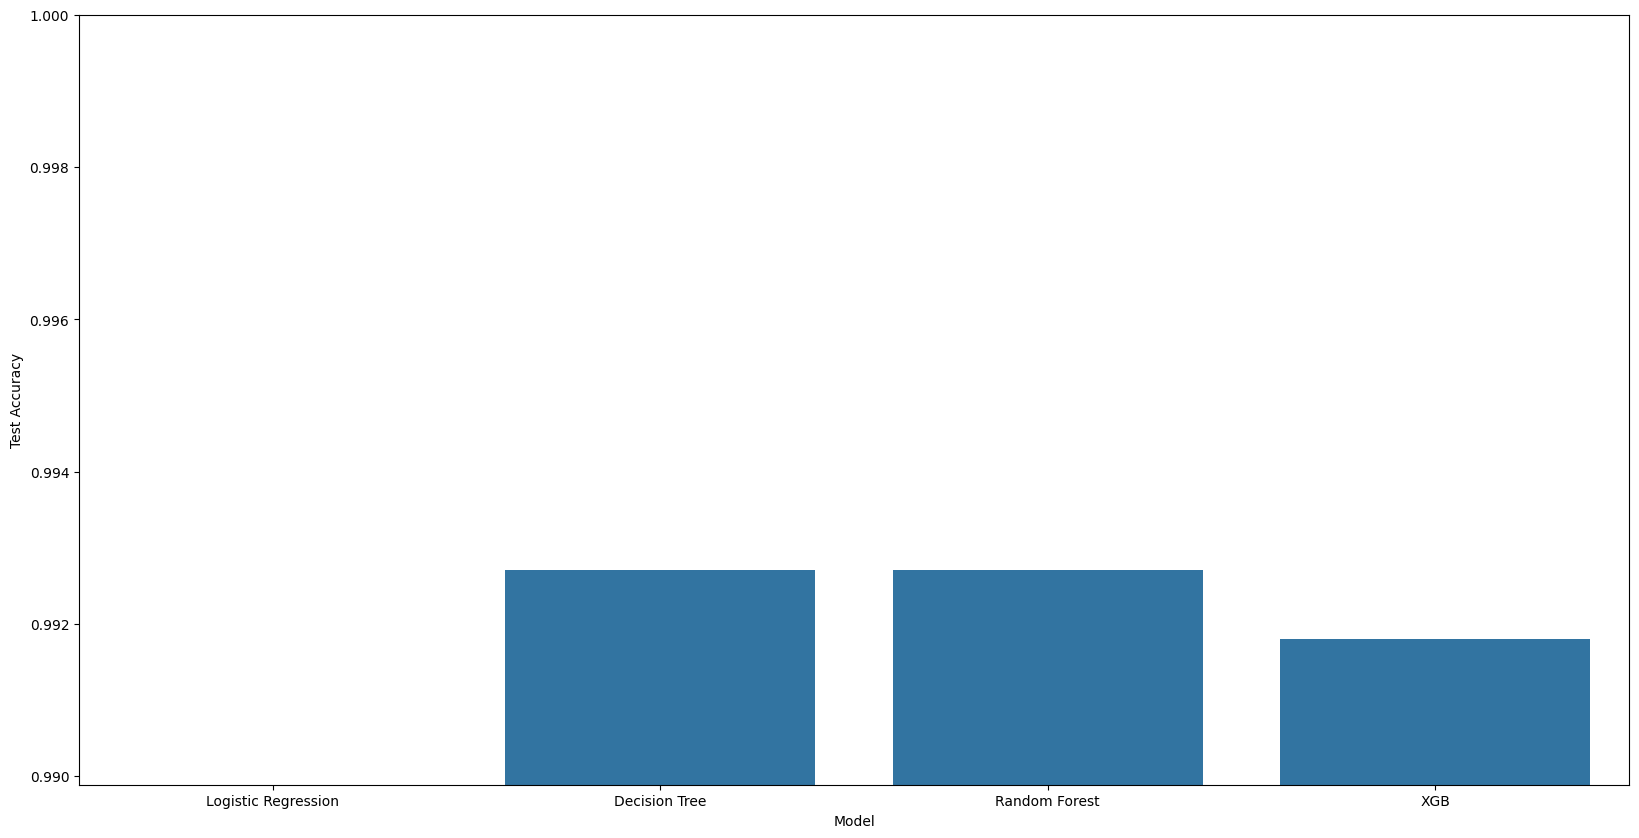

In [61]:
# Plot the results and since there scores are similar then we must make the y axis from 0.8 to 1.0


plt.figure(figsize=(20, 10))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison_df)
plt.ylim(0.989888, 1.0)
plt.show()
